In [1]:
# Importing all necessary libraries. Added in the first cell for clarity.

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [2]:
# Checking breed-intelligence dataset.
# Columns 'reps_lower' and 'reps_upper' are the minimum and maximum number of repetitions needed for the dog to fulfill a task.

dog_int = pd.read_csv('dog_intelligence.csv')
dog_int

,Breed,Classification,obey,reps_lower,reps_upper
0,Border Collie,Brightest Dogs,95%,1,4
1,Poodle,Brightest Dogs,95%,1,4
2,German Shepherd,Brightest Dogs,95%,1,4
3,Golden Retriever,Brightest Dogs,95%,1,4
4,Doberman Pinscher,Brightest Dogs,95%,1,4
...,...,...,...,...,...
131,Borzoi,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
132,Chow Chow,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
133,Bulldog,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
134,Basenji,Lowest Degree of Working/Obedience Intelligence,NaN,81,100


In [3]:
# Checking breed-height-weight dataset.

breed_info = pd.read_csv('breed_info.csv', encoding= 'unicode_escape')
breed_info

,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,Akita,26,28,80,120
1,Anatolian Sheepdog,27,29,100,150
2,Bernese Mountain Dog,23,27,85,110
3,Bloodhound,24,26,80,120
4,Borzoi,26,28,70,100
...,...,...,...,...,...
145,Papillon,8,11,5,10
146,Pomeranian,12,12,3,7
147,Poodle Toy,10,10,10,10
148,Toy Fox Terrier,10,10,4,7


In [4]:
# Merging both datasets in order to manage all the info together.

breed_int = dog_int.merge(breed_info, left_on = 'Breed', right_on = 'Breed')
breed_int

,Breed,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,Border Collie,Brightest Dogs,95%,1,4,19,21,40,40
1,Golden Retriever,Brightest Dogs,95%,1,4,21,24,55,75
2,Doberman Pinscher,Brightest Dogs,95%,1,4,26,28,60,100
3,Labrador Retriever,Brightest Dogs,95%,1,4,21,24,55,80
4,Papillon,Brightest Dogs,95%,1,4,8,11,5,10
...,...,...,...,...,...,...,...,...,...
100,Bloodhound,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,24,26,80,120
101,Borzoi,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,26,28,70,100
102,Chow Chow,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,19,22,45,55
103,Basenji,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,17,17,20,22


In [5]:
# Looking for NaNs in weight and height (For some reason, the original dataset had 'na' string instead of NaN).

breed_int.loc[breed_int.weight_high_lbs == 'na']

,Breed,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
70,Alaskan Malamute,Average Working/Obedience Intelligence,50%,26,40,na,na,na,na


In [6]:
# Data for the height and weight 'na' researched and filled. 
# Since all the other values are strings, the replace is done with strings also, in order to change everything together later.

breed_int.replace({'height_high_inches':{'na':'25'}, 'height_low_inches':{'na':'25'}, 'weight_high_lbs':{'na':'82'}, 'weight_low_lbs':{'na':'82'}}, inplace= True)

In [7]:
# Transformation of strings into numerical values.

breed_int['height_low_inches'] = pd.to_numeric(breed_int['height_low_inches'])
breed_int['height_high_inches'] = pd.to_numeric(breed_int['height_high_inches'])
breed_int['weight_low_lbs'] = pd.to_numeric(breed_int['weight_low_lbs'])
breed_int['weight_high_lbs'] = pd.to_numeric(breed_int['weight_high_lbs'])

In [8]:
breed_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 9 columns):
Breed                 105 non-null object
Classification        105 non-null object
obey                  96 non-null object
reps_lower            105 non-null int64
reps_upper            105 non-null int64
height_low_inches     105 non-null float64
height_high_inches    105 non-null float64
weight_low_lbs        105 non-null int64
weight_high_lbs       105 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 8.2+ KB


In [9]:
# Getting mean values of each height and weight minimum and maximum, to ease the analysis.

breed_int['Height'] = (0.5 * breed_int['height_low_inches']) + (0.5 * breed_int['height_high_inches'])
breed_int['Weight'] = (0.5 * breed_int['weight_low_lbs']) + (0.5 * breed_int['weight_high_lbs'])
 
breed_int

,Breed,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,Height,Weight
0,Border Collie,Brightest Dogs,95%,1,4,19.0,21.0,40,40,20.0,40.0
1,Golden Retriever,Brightest Dogs,95%,1,4,21.0,24.0,55,75,22.5,65.0
2,Doberman Pinscher,Brightest Dogs,95%,1,4,26.0,28.0,60,100,27.0,80.0
3,Labrador Retriever,Brightest Dogs,95%,1,4,21.0,24.0,55,80,22.5,67.5
4,Papillon,Brightest Dogs,95%,1,4,8.0,11.0,5,10,9.5,7.5
...,...,...,...,...,...,...,...,...,...,...,...
100,Bloodhound,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,24.0,26.0,80,120,25.0,100.0
101,Borzoi,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,26.0,28.0,70,100,27.0,85.0
102,Chow Chow,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,19.0,22.0,45,55,20.5,50.0
103,Basenji,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,17.0,17.0,20,22,17.0,21.0


In [10]:
# Cleaning original height and weight columns, now the mean values can be used.

del breed_int['height_low_inches']
del breed_int['height_high_inches']
del breed_int['weight_low_lbs']
del breed_int['weight_high_lbs']
breed_int

,Breed,Classification,obey,reps_lower,reps_upper,Height,Weight
0,Border Collie,Brightest Dogs,95%,1,4,20.0,40.0
1,Golden Retriever,Brightest Dogs,95%,1,4,22.5,65.0
2,Doberman Pinscher,Brightest Dogs,95%,1,4,27.0,80.0
3,Labrador Retriever,Brightest Dogs,95%,1,4,22.5,67.5
4,Papillon,Brightest Dogs,95%,1,4,9.5,7.5
...,...,...,...,...,...,...,...
100,Bloodhound,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,25.0,100.0
101,Borzoi,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,27.0,85.0
102,Chow Chow,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,20.5,50.0
103,Basenji,Lowest Degree of Working/Obedience Intelligence,NaN,81,100,17.0,21.0


In [54]:
# Checking last rows, where there were no values for 'obey'.

breed_int.tail(55)

,Breed,Classification,obey,reps_lower,reps_upper,Height,Weight
50,Saluki,Average Working/Obedience Intelligence,50,26,40,25.5,52.5
51,Finnish Spitz,Average Working/Obedience Intelligence,50,26,40,17.5,33.0
52,Pointer,Average Working/Obedience Intelligence,50,26,40,22.5,55.0
53,Cavalier King Charles Spaniel,Average Working/Obedience Intelligence,50,26,40,12.5,17.5
54,German Wirehaired Pointer,Average Working/Obedience Intelligence,50,26,40,24.0,65.0
55,American Water Spaniel,Average Working/Obedience Intelligence,50,26,40,16.5,35.0
56,Siberian Husky,Average Working/Obedience Intelligence,50,26,40,21.5,50.0
57,Bichon Frise,Average Working/Obedience Intelligence,50,26,40,10.5,14.0
58,Tibetan Spaniel,Average Working/Obedience Intelligence,50,26,40,10.0,12.0
59,English Foxhound,Average Working/Obedience Intelligence,50,26,40,23.5,67.5


In [12]:
# With the info on 'Classification', 'reps_lower' and 'reps_upper', the NaNs on 'obey' lower rows can be filled.

breed_int['obey'] = breed_int['obey'].fillna('15%')

In [13]:
# Getting rid of the percentage sign in 'obey' values and transforming to integer.

def percentage_sign_remover(string):
    return int(re.sub('%', '', string))

breed_int['obey'] = breed_int['obey'].apply(percentage_sign_remover)
breed_int.head()

,Breed,Classification,obey,reps_lower,reps_upper,Height,Weight
0,Border Collie,Brightest Dogs,95,1,4,20.0,40.0
1,Golden Retriever,Brightest Dogs,95,1,4,22.5,65.0
2,Doberman Pinscher,Brightest Dogs,95,1,4,27.0,80.0
3,Labrador Retriever,Brightest Dogs,95,1,4,22.5,67.5
4,Papillon,Brightest Dogs,95,1,4,9.5,7.5


In [14]:
breed_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 7 columns):
Breed             105 non-null object
Classification    105 non-null object
obey              105 non-null int64
reps_lower        105 non-null int64
reps_upper        105 non-null int64
Height            105 non-null float64
Weight            105 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 6.6+ KB


In [16]:
# Now the intelligence classification is complete, reps info is not needed anymore.
# Obey column is called 'Resposivity' to better reflect the measurement as the result of dogs responding to tasks.

brint = breed_int.rename(columns={'obey': 'Responsivity'})
del brint['reps_lower']
del brint['reps_upper']
brint

,Breed,Classification,Responsivity,Height,Weight
0,Border Collie,Brightest Dogs,95,20.0,40.0
1,Golden Retriever,Brightest Dogs,95,22.5,65.0
2,Doberman Pinscher,Brightest Dogs,95,27.0,80.0
3,Labrador Retriever,Brightest Dogs,95,22.5,67.5
4,Papillon,Brightest Dogs,95,9.5,7.5
...,...,...,...,...,...
100,Bloodhound,Lowest Degree of Working/Obedience Intelligence,15,25.0,100.0
101,Borzoi,Lowest Degree of Working/Obedience Intelligence,15,27.0,85.0
102,Chow Chow,Lowest Degree of Working/Obedience Intelligence,15,20.5,50.0
103,Basenji,Lowest Degree of Working/Obedience Intelligence,15,17.0,21.0


In [17]:
# Some mistakes were found in 'Height' and 'Weight' (e.g. weight value in the place of the height value, or just incorrect values) and fixed.

brint.Height.loc[19] = 23.5
brint.Weight.loc[19] = 57
brint.Height.loc[92] = 29.5

# Checking Vizsla
brint.loc[19]

C:\Users\yago\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Breed                             Vizsla
Classification    Excellent Working Dogs
Responsivity                          85
Height                              23.5
Weight                                57
Name: 19, dtype: object

In [18]:
# Checking Saint Bernard
brint.loc[92]

Breed                                   Saint Bernard
Classification    Fair Working/Obedience Intelligence
Responsivity                                       30
Height                                           29.5
Weight                                            150
Name: 92, dtype: object

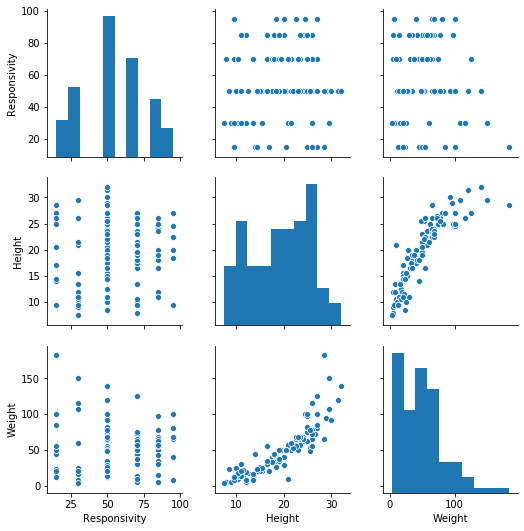

In [19]:
# Plotting data to look for possible relationships.

sns.pairplot(brint)

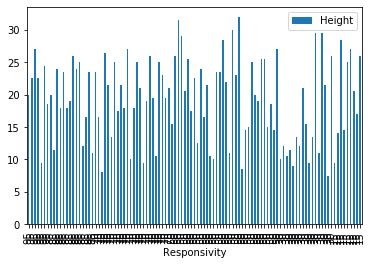

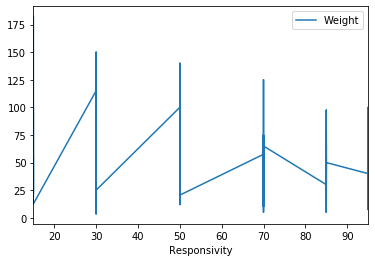

In [117]:
brint.plot('Responsivity', y='Height')
brint.plot('Responsivity', y='Weight')
plt.show()

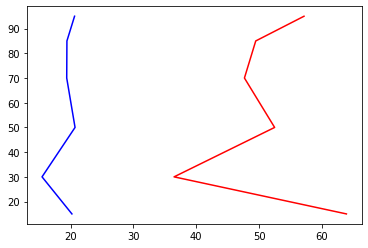

In [20]:
# Grouping by 'Responsivity' for further analysis, since height and weight are obviously related.

grouped = brint.groupby('Responsivity', as_index=False).mean()

plt.plot(grouped['Height'], grouped['Responsivity'], c='b')
plt.plot(grouped['Weight'], grouped['Responsivity'], c='r')
plt.show()

In [21]:
# Each Responsivity category contains (correct) outlyiers, which harden to find a correlation, if it exist.

brint.loc[brint.Responsivity == 95]

,Breed,Classification,Responsivity,Height,Weight
0,Border Collie,Brightest Dogs,95,20.0,40.0
1,Golden Retriever,Brightest Dogs,95,22.5,65.0
2,Doberman Pinscher,Brightest Dogs,95,27.0,80.0
3,Labrador Retriever,Brightest Dogs,95,22.5,67.5
4,Papillon,Brightest Dogs,95,9.5,7.5
5,Rottweiler,Brightest Dogs,95,24.5,100.0
6,Australian Cattle Dog,Brightest Dogs,95,18.5,40.0


In [22]:
brint.Responsivity.unique()

array([95, 85, 70, 50, 30, 15], dtype=int64)

In [23]:
brint.Classification.unique()

array(['Brightest Dogs', 'Excellent Working Dogs',
       'Above Average Working Dogs',
       'Average Working/Obedience Intelligence',
       'Fair Working/Obedience Intelligence',
       'Lowest Degree of Working/Obedience Intelligence '], dtype=object)

In [24]:
brint.Breed.unique()

array(['Border Collie', 'Golden Retriever', 'Doberman Pinscher',
       'Labrador Retriever', 'Papillon', 'Rottweiler',
       'Australian Cattle Dog', 'English Springer Spaniel', 'Schipperke',
       'Belgian Sheepdog', 'Keeshond', 'German Shorthaired Pointer',
       'Standard Schnauzer', 'Brittany', 'Weimaraner', 'Belgian Malinois',
       'Bernese Mountain Dog', 'Pomeranian', 'Irish Water Spaniel',
       'Vizsla', 'Cardigan Welsh Corgi', 'Chesapeake Bay Retriever',
       'Puli', 'Yorkshire Terrier', 'Giant Schnauzer',
       'Portuguese Water Dog', 'Border Terrier', 'Briard',
       'Welsh Springer Spaniel', 'Samoyed', 'Field Spaniel',
       'Newfoundland', 'Australian Terrier',
       'American Staffordshire Terrier', 'Gordon Setter',
       'Bearded Collie', 'Cairn Terrier', 'Kerry Blue Terrier',
       'Irish Setter', 'Norwegian Elkhound', 'Affenpinscher',
       'English Setter', 'Pharaoh Hound', 'Clumber Spaniel', 'Dalmatian',
       'Bedlington Terrier', 'Curly Coated Retr

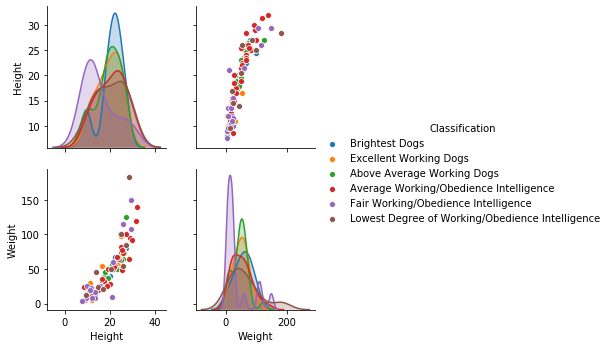

In [25]:
# Simplifying to a chart with only the necessary info.
pre_ml_data = brint[['Classification','Height','Weight']].copy()

# Plotting relationship with Responsivity  
sns.pairplot(data= pre_ml_data, hue='Classification')
plt.show()

In [26]:
# pre_ml_data.replace({'Classification':{'Brightest Dogs': 'Brightest', 'Excellent Working Dogs': 'Excellent',
#        'Above Average Working Dogs': 'Above_Average',
#        'Average Working/Obedience Intelligence': 'Average',
#        'Fair Working/Obedience Intelligence': 'Below_Average',
#       'Lowest Degree of Working/Obedience Intelligence ': 'Lowest'}}, inplace= True)
# pre_ml_data = pd.get_dummies(ml_data)
# 
# pre_ml_data.head()

In [27]:
# Transforming responsivity categories to numerical for ML work

pre_ml_data.replace({'Classification':{'Brightest Dogs': 0, 'Excellent Working Dogs': 1,
       'Above Average Working Dogs': 2,
       'Average Working/Obedience Intelligence': 3,
       'Fair Working/Obedience Intelligence': 4,
       'Lowest Degree of Working/Obedience Intelligence ': 5}}, inplace= True)

pre_ml_data.head(20)

,Classification,Height,Weight
0,0,20.0,40.0
1,0,22.5,65.0
2,0,27.0,80.0
3,0,22.5,67.5
4,0,9.5,7.5
5,0,24.5,100.0
6,0,18.5,40.0
7,1,20.0,50.0
8,1,11.5,15.0
9,1,24.0,67.5


In [29]:
# Creating six clusters for Height and Weight values.

ml_data = pre_ml_data[['Height','Weight']].copy()

model = KMeans(n_clusters=6)
clusters = model.fit(ml_data)
ml_data['Kmeans_labels'] = clusters.fit_predict(ml_data)

ml_data.head(20)

,Height,Weight,Kmeans_labels
0,20.0,40.0,4
1,22.5,65.0,2
2,27.0,80.0,2
3,22.5,67.5,2
4,9.5,7.5,5
5,24.5,100.0,1
6,18.5,40.0,4
7,20.0,50.0,4
8,11.5,15.0,5
9,24.0,67.5,2


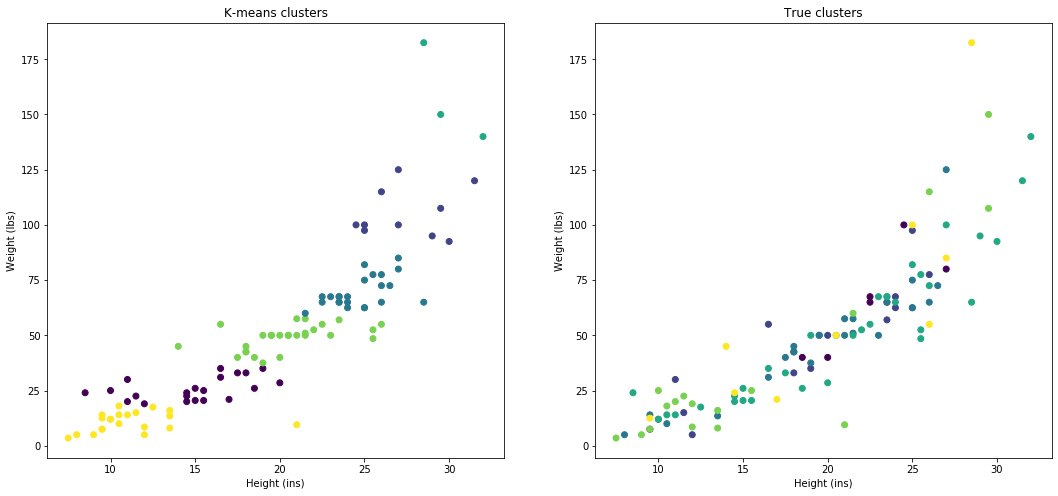

In [30]:
# Clustering and plotting, taking into account the intelligente classification parameter.

ml_data['True_labels'] = pre_ml_data['Classification']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 8))
ax1.scatter(ml_data['Height'], ml_data['Weight'], c=ml_data['Kmeans_labels'])
ax2.scatter(ml_data['Height'], ml_data['Weight'], c=ml_data['True_labels'])
ax1.set_title('K-means clusters')
ax2.set_title('True clusters')
ax1.set_xlabel('Height (ins)')
ax2.set_xlabel('Height (ins)')
ax1.set_ylabel('Weight (lbs)')
ax2.set_ylabel('Weight (lbs)')

plt.show()

In [31]:
# Checking content on each cluster.
ml_data.Kmeans_labels.value_counts()

4    27
2    23
5    21
0    21
1    10
3     3
Name: Kmeans_labels, dtype: int64

In [80]:
# Checking cluster assignment of new data.

test_df = pd.DataFrame({'Height': [30], 'Weight': [40]})
test_df['Kmeans_labels'] = clusters.predict(test_df)

In [83]:
test_df.get_value(0, 'Kmeans_labels')

C:\Users\yago\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


4

In [82]:
# Creating a function that allows the user to input new data, which will be assigned to its correspondent responsivity cluster.
# The program can now provide the intelligence level of any dog, given height and weight.

def imaginary_dog():
    height = int(input('\nInsert dog´s height in inches:'))
    weight = int(input('Insert dog´s weight in pounds:'))
    
    test_df = pd.DataFrame({'Height': [height], 'Weight': [weight]})
    test_df['Kmeans_labels'] = clusters.predict(test_df)
    
    dog_iq = test_df.get_value(0, 'Kmeans_labels')
    if dog_iq == 0:
        print('\nThis dog would have a lot of nice things, intelligence is not that important.')
    if dog_iq == 1:
        print('\nThis dog would have a fair level of intelligence.')
    if dog_iq == 2:
        print('\nThis dog would have an average level of intelligence.')
    if dog_iq == 3:
        print('\nThis dog would have an above average intelligence.')
    if dog_iq == 4:
        print('\nThis dog would have a very high level of intelligence.')
    if dog_iq == 5:
        print('\nThis would be one of the brightest dogs ever!')

In [87]:
imaginary_dog()


Insert dog´s height in inches:17
Insert dog´s weight in pounds:20

This dog would have a lot of nice things, intelligence is not that important.


C:\Users\yago\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
